# A. KNN

## A.1. Introduction

### Import Libraries

First, let's import some libraries that we will use to demonstrate K - Nearest Neighbor.

In [ ]:
# Import Libraris

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score

%matplotlib inline

### Generate sample data

In [ ]:
# Function for Generate Data that will be Used by KNN

def generate_sample(x1_center, x2_center, max_radius, num_samples, ymax=999, ymin=-999):
    i = 0
    x1_list = []
    x2_list = []
    x1_min = x1_center - max_radius
    x1_max = x1_center + max_radius
    x2_min = x2_center - max_radius
    x2_max = x2_center + max_radius
    while i < num_samples:
        x1 = np.random.uniform(x1_min, x1_max)
        x2 = np.random.uniform(x2_min, x2_max)
        mag_data = np.power(x1 - x1_center, 2) + np.power(x2 - x2_center, 2)
        if (
            (mag_data <= np.power(max_radius, 2))
            & (x2 > ymin)
            & (x2 < ymax)
        ):
            x1_list.append(x1)
            x2_list.append(x2)
            i = i + 1
        else:
            continue

    return np.vstack((x1_list, x2_list)).T

In [ ]:
# Generate Dataset

x1_centers = [0, 0, 2]
x2_centers = [0, 2, 0]
num_data = 50

datas = []
for i in range(0,len(x1_centers)):
    datas.append(generate_sample(x1_centers[i], x2_centers[i], 1.5, num_data))
    
X = np.vstack(datas)
y = list(np.hstack([[1] * num_data,[2] * num_data,[3] * num_data]))

In [ ]:
# Display Data

## Display First 10 Data from X and y
print('First 10 Data')
print('X : ', X[:10])
print('y : ', y[:10])
print('')

## Display Number of Total Data per Class
print('Number of Total Data per Class')
for cls in list(set(y)):
  print('Class : ', cls, ' - Count : ', y.count(cls))

First 10 Data
X :  [[-1.48648924 -0.1516173 ]
 [ 0.5802344  -1.12803097]
 [ 1.07125109 -0.41557265]
 [ 0.50075553  0.33477996]
 [ 0.26209818  1.25476385]
 [-0.95717846  0.69296393]
 [ 0.15726748 -0.76479954]
 [-0.79111192  0.16053078]
 [ 1.39129673  0.40303406]
 [ 1.06723784 -0.40600794]]
y :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Number of Total Data per Class
Class :  1  - Count :  50
Class :  2  - Count :  50
Class :  3  - Count :  50


(-2.0, 4.0)

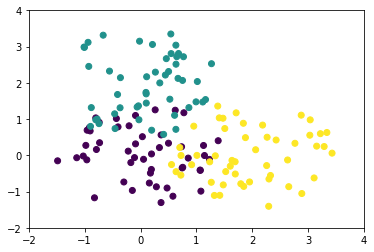

In [ ]:
# Visualization of Dataset

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-2,4)
plt.ylim(-2,4)

Color description from above graph :
* Class `1` : Purple
* Class `2` : Green
* Class `3` : Yellow

In [ ]:
# Save the Colors into a Dictionary

class_colors = {
    '1': 'purple',
    '2': 'green',
    '3': 'yellow'
}

### Nearest Neighbors

Let's find the neighbors of two test data on the previously created dataset. To do that, we are going to implement module `NearestNeighbors` from Scikit-learn.

In [ ]:
# Define Two Test Data

X_sample = np.array(([0,1],[1,0]))

In [ ]:
# Create Object of NearestNeighbors and Enter Dataset into this Object

neigh = NearestNeighbors(n_neighbors=15)
neigh.fit(X,y)

NearestNeighbors(n_neighbors=15)

In [ ]:
# Get the Neighbors for Test Data

neighbors_distances, neighbors_indices = neigh.kneighbors(X_sample)
y = np.array(y)

print('X_sample[0]               : ', X_sample[0])
print('Neighbors Distance        : ', neighbors_distances[0].tolist())
print('Neighbors Index           : ', neighbors_indices[0])
print('Neighbors Class           : ', y[neighbors_indices[0]])
print('Neighbors Class (Counter) : ', [(cls, list(y[neighbors_indices[0]]).count(cls)) for cls in list(set(y))])
print('Max Class                 : ', max(list(y[neighbors_indices[0]]), key=list(y[neighbors_indices[0]]).count))
print('Class Color               : ', class_colors[str(max(list(y[neighbors_indices[0]]), key=list(y[neighbors_indices[0]]).count))])
print('')

print('X_sample[1]               : ', X_sample[1])
print('Neighbors Distance        : ', neighbors_distances[1].tolist())
print('Neighbors Index           : ', neighbors_indices[1])
print('Neighbors Class           : ', y[neighbors_indices[1]])
print('Neighbors Class (Counter) : ', [(cls, list(y[neighbors_indices[1]]).count(cls)) for cls in list(set(y))])
print('Max Class                 : ', max(list(y[neighbors_indices[1]]), key=list(y[neighbors_indices[1]]).count))
print('Class Color               : ', class_colors[str(max(list(y[neighbors_indices[1]]), key=list(y[neighbors_indices[1]]).count))])
print('')

X_sample[0]               :  [0 1]
Neighbors Distance        :  [0.034967867079784457, 0.13417267253501688, 0.2771403296098967, 0.33901110251055033, 0.36551344009449616, 0.36568698053129567, 0.36707199752968456, 0.43352481342381505, 0.45343505877964563, 0.457190318381961, 0.4817073425359362, 0.4859789656821533, 0.4869429699171155, 0.5262285545678046, 0.5717198119504989]
Neighbors Index           :  [53 42 35 91  4 64 86 44 67 17 78 95 22 59 33]
Neighbors Class           :  [2 1 1 2 1 2 2 1 2 1 2 2 1 2 1]
Neighbors Class (Counter) :  [(1, 7), (2, 8), (3, 0)]
Max Class                 :  2
Class Color               :  green

X_sample[1]               :  [1 0]
Neighbors Distance        :  [0.010481864734304, 0.14613914866859565, 0.1642372453462905, 0.26027301029389394, 0.2718857656160139, 0.2748079658672129, 0.2991391936807022, 0.30068765254404867, 0.340456134005496, 0.35511668301618937, 0.366460545726021, 0.4111431046619065, 0.4115378149583676, 0.4216365116963709, 0.4319024760261009]
Nei

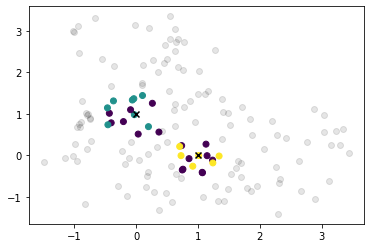

In [ ]:
# Visualization of the Neighbors of Test Data

neighbors_indices = neighbors_indices.flatten().tolist()

X_neighbors =  X[neighbors_indices]
y_neighbors = y[neighbors_indices]
X_not_neighbors = np.array([element for i, element in enumerate(X) if i not in neighbors_indices])


plt.scatter(X_neighbors[:,0], X_neighbors[:,1], c=y_neighbors)
plt.scatter(X_sample[:,0], X_sample[:,1], marker='x', c='k')
plt.scatter(X_not_neighbors[:,0], X_not_neighbors[:,1], c='k', alpha=0.1)

As we see, there are data points that are closer to our sample points compared to other neighbors. Currently, those close data points will have the same vote weight as the one that is farther. We can modify this charactheristic by using euclidean distance as weight factor on majority vote to reflect that closer data points have closer resemblance.

### Using K-Nearest Neighbor Classifier

In the code above, we see the neighbors for test data. But we must compute manually the maximum class to get the prediction class. Let's use module `KNeighborsClassifier` from Scikit Learn to get automatically our class prediction.

In [ ]:
# Create Object of KNeighborsClassifier and Enter Dataset into this Object

neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
# Predict Test Data

y_predictions = neigh.predict(X_sample)

print('Predictions - X_sample[0] : ', y_predictions[0])
print('Predictions - X_sample[1] : ', y_predictions[1])

Predictions - X_sample[0] :  2
Predictions - X_sample[1] :  1


### Effect of distance functions

We can use different type of distances function, which may results to different nearest neighbors. For example, let's try using 4 different distances type:  
- Euclidean 
- Minkowski
- Manhattan
- Mahalanobis

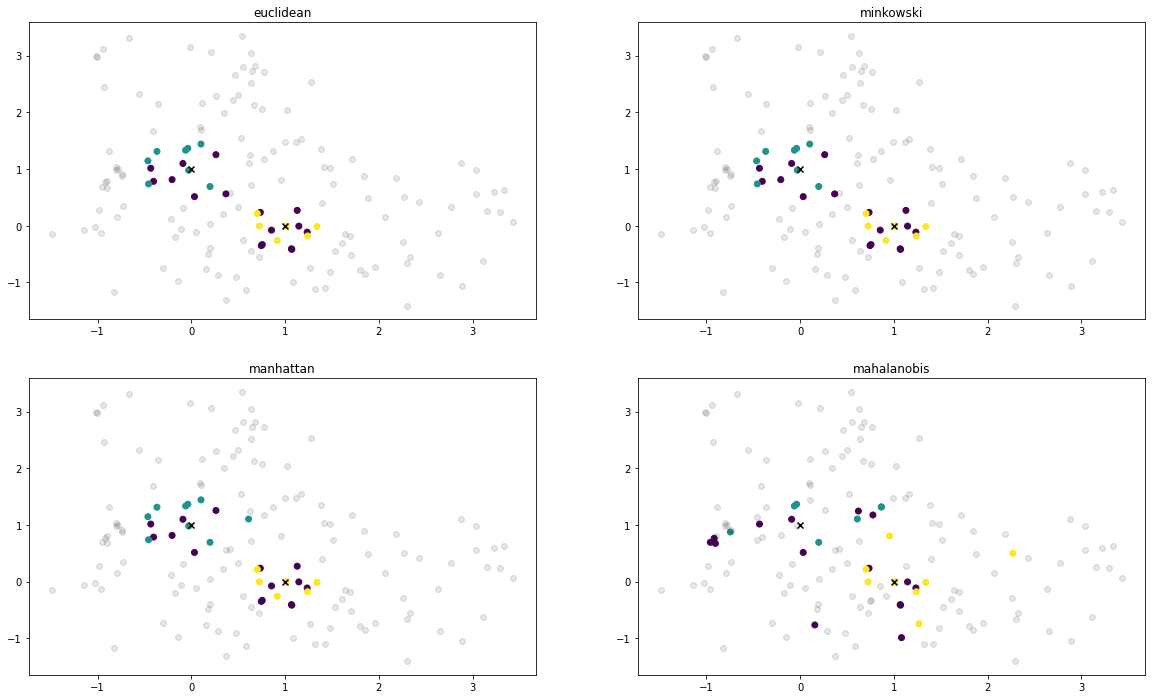

In [ ]:
metrictypes=['euclidean','minkowski','manhattan','mahalanobis']
fig, axs = plt.subplots(int(len(metrictypes)/2), 2, figsize=(20, 12))
for i,metrictype in enumerate(metrictypes):
    if(metrictype=='mahalanobis'):
        neigh = NearestNeighbors(n_neighbors=15,algorithm='brute', metric=metrictype,metric_params={'VI': np.cov(X)})
    else:
        neigh = NearestNeighbors(n_neighbors=15,metric=metrictype)
    neigh.fit(X,y)
    neighbors=neigh.kneighbors(X_sample)
    id_arr = neighbors[1]
    id_arr = id_arr.flatten().tolist()

    arr =  X[id_arr]
    y = np.array(y)
    arr_y = y[id_arr]
    arr_ex = np.array([element for i, element in enumerate(X) if i not in id_arr])

    axs[int(i/2),i%2].scatter(arr[:,0],arr[:,1],c=arr_y)
    axs[int(i/2),i%2].scatter(X_sample[:,0],X_sample[:,1],marker='x',c='k')
    axs[int(i/2),i%2].scatter(arr_ex[:,0],arr_ex[:,1],c='k',alpha=0.1)
    axs[int(i/2),i%2].set_title(metrictype)

We can see there are changes at the edges point due to how the distance calculated differently

---
## A.2. KNN on Real Dataset

Let's try to use KNN Classifier on real world data. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


URL = [Prima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [ ]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D4AM%20-%20KNN%20%26%20Naive%20Bayes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check Features of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that the dataset has no missing values.

In [ ]:
# Create Final Dataset

X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [ ]:
# Split Dataset into Train Data and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

print('Total Data Train : ', X_train.shape[0])
print('Total Data Test  : ', X_test.shape[0])

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Total Data Train :  537
Total Data Test  :  231


In [ ]:
# Train

%%time
cls_knn_euclidean = KNeighborsClassifier(n_neighbors=5)
cls_knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

cls_knn_euclidean.fit(X_train, y_train)
cls_knn_manhattan.fit(X_train, y_train)

CPU times: user 8.54 ms, sys: 75 µs, total: 8.62 ms
Wall time: 8.57 ms


In [ ]:
# Check Accuracy of Test Data

acc_knn_euclidean = cls_knn_euclidean.score(X_test, y_test)
acc_knn_manhattan = cls_knn_manhattan.score(X_test, y_test)

print('Accuracy - KNN - Euclidean : ', acc_knn_euclidean)
print('Accuracy - KNN - Manhattan : ', acc_knn_manhattan)

Accuracy - KNN - Euclidean :  0.7229437229437229
Accuracy - KNN - Manhattan :  0.6796536796536796


---

Let's check the effect of `k` on the accuracy of Train Data and Test Data.

In [ ]:
# Get Accuracy from k = 1 to k = 15
%%time

max_k = 15

train_acc_euclidean = []
test_acc_euclidean = []

train_acc_manhattan = []
test_acc_manhattan = []

for ii in range (1, max_k+1):
  # With Euclidean Distance
  cls_knn_euclidean = KNeighborsClassifier(n_neighbors = ii)
  cls_knn_euclidean.fit(X_train, y_train)

  train_acc_euclidean.append(cls_knn_euclidean.score(X_train, y_train))
  test_acc_euclidean.append(cls_knn_euclidean.score(X_test, y_test))

  # With Manhattan Distance
  cls_knn_manhattan = KNeighborsClassifier(n_neighbors = ii, metric='manhattan')
  cls_knn_manhattan.fit(X_train, y_train)

  train_acc_manhattan.append(cls_knn_manhattan.score(X_train, y_train))
  test_acc_manhattan.append(cls_knn_manhattan.score(X_test, y_test))

print('Train Accuracy - Euclidean : ', train_acc_euclidean)
print('Test Accuracy - Euclidean  : ', test_acc_euclidean, '\n')

print('Train Accuracy - Manhattan : ', train_acc_manhattan)
print('Test Accuracy - Manhattan  : ', test_acc_manhattan, '\n')


Train Accuracy - Euclidean :  [1.0, 0.8286778398510242, 0.8230912476722533, 0.7914338919925512, 0.8044692737430168, 0.7746741154562383, 0.7877094972067039, 0.7783985102420856, 0.7914338919925512, 0.7635009310986964, 0.7728119180633147, 0.7653631284916201, 0.7746741154562383, 0.7728119180633147, 0.7690875232774674]
Test Accuracy - Euclidean  :  [0.7056277056277056, 0.70995670995671, 0.7229437229437229, 0.7402597402597403, 0.7229437229437229, 0.7186147186147186, 0.7056277056277056, 0.6926406926406926, 0.7186147186147186, 0.7142857142857143, 0.7359307359307359, 0.7489177489177489, 0.7619047619047619, 0.7575757575757576, 0.7662337662337663] 

Train Accuracy - Manhattan :  [1.0, 0.8119180633147114, 0.8175046554934823, 0.8044692737430168, 0.8026070763500931, 0.7932960893854749, 0.7932960893854749, 0.7728119180633147, 0.7877094972067039, 0.7746741154562383, 0.7746741154562383, 0.7467411545623837, 0.7653631284916201, 0.7616387337057728, 0.7821229050279329]
Test Accuracy - Manhattan  :  [0.7012

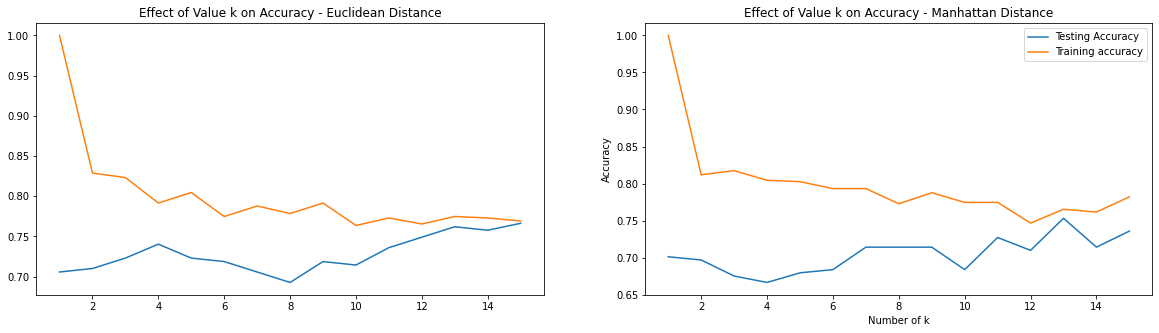

In [ ]:
# Visualization of Accuracy

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('Effect of Value k on Accuracy - Euclidean Distance')
plt.plot(range(1, max_k+1), test_acc_euclidean, label='Testing Accuracy')
plt.plot(range(1, max_k+1), train_acc_euclidean, label='Training accuracy')

plt.subplot(1, 2, 2)
plt.title('Effect of Value k on Accuracy - Manhattan Distance')
plt.plot(range(1, max_k+1), test_acc_manhattan, label='Testing Accuracy')
plt.plot(range(1, max_k+1), train_acc_manhattan, label='Training accuracy')

plt.legend()
plt.xlabel('Number of k')
plt.ylabel('Accuracy')
plt.show()

`kNN Classifier` is a lazy learning method, thus **time to predict is relatively slower compared to time to fit/train**. This is contrast to model like `Logistic Regression`, `Decision Tree`, or `Artifical Neural Network`.

---

Let's compare its performance with logistic regression that we have previously learned

In [ ]:
# Train with Logistic Regression
%%time

logreg = LogisticRegression(random_state=10)
logreg.fit(X_train, y_train)

CPU times: user 9.93 ms, sys: 0 ns, total: 9.93 ms
Wall time: 15.9 ms


In [ ]:
# Check Accuracy of Test Data

acc_logreg = logreg.score(X_test, y_test)

print('Accuracy - KNN - Euclidean     : ', acc_knn_euclidean)
print('Accuracy - KNN - Manhattan     : ', acc_knn_manhattan)
print('Accuracy - Logistic Regression : ', acc_logreg)

Accuracy - KNN - Euclidean     :  0.7229437229437229
Accuracy - KNN - Manhattan     :  0.6796536796536796
Accuracy - Logistic Regression :  0.8095238095238095


---
# B. Naive Bayes

Naive Bayes employ bayesian logic and theorem to infer probability given hypotheses and their evidences.

In [ ]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score
import time
import pandas as pd

%matplotlib inline

To solidify our understanding of Bayes Theorem and Naive Bayes, we will manually implement Bayes Theorem by `Pandas` and compare it with `Scikit-Learn` utility.

We will intialize a toy dataset containing **whether a family buy a car given their family structure, age group, and income**.

In [ ]:
# Assigning features and label variables

family_struct = ['Nuclear','Extended','Childless','Childless','Single Parent','Childless','Nuclear','Nuclear','Extended','Single Parent']
age_group = ['Young','Old','Middle-aged','Young','Middle-aged','Young','Old','Middle-aged','Middle-aged','Old']
income = ['Low','Low','Low','Medium','Medium','Low','High','Medium','High','Low']
buy_car = ['Yes','No','No','Yes','Yes','No','Yes','Yes','Yes','No']

In [ ]:
# Convert to Pandas Dataframe

dict = {'family_struct': family_struct,'age_group':age_group,'income':income,'buy_car':buy_car} 
    
df = pd.DataFrame(dict)
df.columns=list(df.columns[:-1])+['label'] 

In [ ]:
# Display Pandas Dataframe

df

,family_struct,age_group,income,label
0,Nuclear,Young,Low,Yes
1,Extended,Old,Low,No
2,Childless,Middle-aged,Low,No
3,Childless,Young,Medium,Yes
4,Single Parent,Middle-aged,Medium,Yes
5,Childless,Young,Low,No
6,Nuclear,Old,High,Yes
7,Nuclear,Middle-aged,Medium,Yes
8,Extended,Middle-aged,High,Yes
9,Single Parent,Old,Low,No


---
First, we **count the probability of our class/label**.

In [ ]:
# Create Frequency and Probability Each Label

df_grp_lbl=df.groupby('label').count().reset_index()[['label','income']]
df_grp_lbl.columns=list(df_grp_lbl.columns[:-1])+['f_h']
df_grp_lbl['p_h']=df_grp_lbl['f_h']/df_grp_lbl['f_h'].sum()

In [ ]:
# Display Frequency and Probability for Each Label

df_grp_lbl

,label,f_h,p_h
0,No,4,0.4
1,Yes,6,0.6


Notes : 
* `f_h` : Frequency of a label.
* `p_h` : Probability of a label.

---
Next, **we count the frequency of each events**. We will need this to count the conditional probability.

In [ ]:
# Create a dataframe that contains chopped of a features and its label

df_melt = df.melt(id_vars=['label'],var_name='features',value_name='value')
df_melt.columns=['label']+list(df_melt.columns[1:])

In [ ]:
# Addition - Display `df_melt`

print('Original Dataframe')
print(df)
print('')
print('Chopped Datafram')
print(df_melt)

Original Dataframe
   family_struct    age_group  income label
0        Nuclear        Young     Low   Yes
1       Extended          Old     Low    No
2      Childless  Middle-aged     Low    No
3      Childless        Young  Medium   Yes
4  Single Parent  Middle-aged  Medium   Yes
5      Childless        Young     Low    No
6        Nuclear          Old    High   Yes
7        Nuclear  Middle-aged  Medium   Yes
8       Extended  Middle-aged    High   Yes
9  Single Parent          Old     Low    No

Chopped Datafram
   label       features          value
0    Yes  family_struct        Nuclear
1     No  family_struct       Extended
2     No  family_struct      Childless
3    Yes  family_struct      Childless
4    Yes  family_struct  Single Parent
5     No  family_struct      Childless
6    Yes  family_struct        Nuclear
7    Yes  family_struct        Nuclear
8    Yes  family_struct       Extended
9     No  family_struct  Single Parent
10   Yes      age_group          Young
11    No   

In [ ]:
# Let's group it and get its frequencies

df_grp=df_melt.groupby(['label','features','value']).size().reset_index(name='count')
df_grp.columns=list(df_grp.columns[:-1])+['f_e_given_h']

print(df_grp)

   label       features          value  f_e_given_h
0     No      age_group    Middle-aged            1
1     No      age_group            Old            2
2     No      age_group          Young            1
3     No  family_struct      Childless            2
4     No  family_struct       Extended            1
5     No  family_struct  Single Parent            1
6     No         income            Low            4
7    Yes      age_group    Middle-aged            3
8    Yes      age_group            Old            1
9    Yes      age_group          Young            2
10   Yes  family_struct      Childless            1
11   Yes  family_struct       Extended            1
12   Yes  family_struct        Nuclear            3
13   Yes  family_struct  Single Parent            1
14   Yes         income           High            2
15   Yes         income            Low            1
16   Yes         income         Medium            3


In [ ]:
# Now, we can filter the data based on whatever condition we like. Let's display rows that contains value == `Low`
# f_h = frequency of Yes/No (regardless of attributes)
# p_h = probabilty of Yes/No (regardless of attributes) (P(Yes) or P(No))

# f_e_given_h = frequency of Yes/No given a specific attribute
# p_e_given_h = probability of Yes/No given a specific attribute (P(attribute | Yes/No))

df_grp[df_grp['value']=='Low'].head(5)

,label,features,value,f_e_given_h
6,No,income,Low,4
15,Yes,income,Low,1


In [ ]:
# Merging chopped dataframe with frequency and probability of label

df_a=df_grp.groupby((['features','value'])).count().reset_index()[['features','value']]
df_a['key']=1
df_b = df_grp_lbl
df_b['key']=1
df_feat=pd.merge(df_a, df_b, on ='key').drop("key", 1)

print(df_feat)

         features          value label  f_h  p_h
0       age_group    Middle-aged    No    4  0.4
1       age_group    Middle-aged   Yes    6  0.6
2       age_group            Old    No    4  0.4
3       age_group            Old   Yes    6  0.6
4       age_group          Young    No    4  0.4
5       age_group          Young   Yes    6  0.6
6   family_struct      Childless    No    4  0.4
7   family_struct      Childless   Yes    6  0.6
8   family_struct       Extended    No    4  0.4
9   family_struct       Extended   Yes    6  0.6
10  family_struct        Nuclear    No    4  0.4
11  family_struct        Nuclear   Yes    6  0.6
12  family_struct  Single Parent    No    4  0.4
13  family_struct  Single Parent   Yes    6  0.6
14         income           High    No    4  0.4
15         income           High   Yes    6  0.6
16         income            Low    No    4  0.4
17         income            Low   Yes    6  0.6
18         income         Medium    No    4  0.4
19         income   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


---
Then, we built the conditional probability table. In case there is a combination of event and hypotheses that never happened, i.e. Nuclei family size not buying car, we will fill the conditional probability with the prior probability of given class.

In [ ]:
# Combine all dataframe into one big dataframe with its frequencies and probabilities

df_prob=df_feat.merge(df_grp,on=['label','features','value'], how='outer')
df_prob['p_e_given_h']=df_prob['f_e_given_h']/df_prob['f_h']
df_prob['p_e_given_h']=df_prob['p_e_given_h'].fillna(0)

print(df_prob)

         features          value label  f_h  p_h  f_e_given_h  p_e_given_h
0       age_group    Middle-aged    No    4  0.4          1.0     0.250000
1       age_group    Middle-aged   Yes    6  0.6          3.0     0.500000
2       age_group            Old    No    4  0.4          2.0     0.500000
3       age_group            Old   Yes    6  0.6          1.0     0.166667
4       age_group          Young    No    4  0.4          1.0     0.250000
5       age_group          Young   Yes    6  0.6          2.0     0.333333
6   family_struct      Childless    No    4  0.4          2.0     0.500000
7   family_struct      Childless   Yes    6  0.6          1.0     0.166667
8   family_struct       Extended    No    4  0.4          1.0     0.250000
9   family_struct       Extended   Yes    6  0.6          1.0     0.166667
10  family_struct        Nuclear    No    4  0.4          NaN     0.000000
11  family_struct        Nuclear   Yes    6  0.6          3.0     0.500000
12  family_struct  Single

Notes : 

```
f_h = frequency of Yes/No (regardless of attributes)
p_h = probabilty of Yes/No (regardless of attributes) (P(Yes) or P(No))

f_e_given_h = frequency of Yes/No given a specific attribute
p_e_given_h = probability of Yes/No given a specific attribute (P(attribute | Yes/No))
```

---
We can then use this table as a lookup to infer our data. As example, lets try to infer a family which is **Single Parent, Young, with Low income**.

In [ ]:
# Step 1 : Get all data with attributes where `family_struct=Single Parent`, or `age_group=Young`, or `income=Low` regardless its label/target.
df_ext = df_prob[(df_prob['value'].isin(['Single Parent','Young','Low']))]
print('Step 1')
print(df_ext)
print('')

# Step 2 : Get probability based on filtered data from Step 1 for each label (`Yes` and `No`).
# How ? By multiply all probability values (`p_e_given_h`) based on the label/target ('Yes` and `No`)
df_ext = df_ext.groupby('label').agg({'p_e_given_h':np.prod}).reset_index()
print('Step 2')
print(df_ext)
print('')

# Step 3 : Get sum/total of this two probabilities values.
total_prob = df_ext['p_e_given_h'].sum()
print('Step 3')
print('Total Probability : ', total_prob)
print('')

# Step 4 : Divide `p_e_given_h` with `total_prob`
print('Step 4')
df_ext['norm_prob']=df_ext['p_e_given_h']/total_prob
print(df_ext)

Step 1
         features          value label  f_h  p_h  f_e_given_h  p_e_given_h
4       age_group          Young    No    4  0.4          1.0     0.250000
5       age_group          Young   Yes    6  0.6          2.0     0.333333
12  family_struct  Single Parent    No    4  0.4          1.0     0.250000
13  family_struct  Single Parent   Yes    6  0.6          1.0     0.166667
16         income            Low    No    4  0.4          4.0     1.000000
17         income            Low   Yes    6  0.6          1.0     0.166667

Step 2
  label  p_e_given_h
0    No     0.062500
1   Yes     0.009259

Step 3
Total Probability :  0.07175925925925926

Step 4
  label  p_e_given_h  norm_prob
0    No     0.062500   0.870968
1   Yes     0.009259   0.129032


---
Let's inference all our training data

In [ ]:
# Inferencing all possibilities of features based on given dataset

small_dfs = []
X=df[df.columns[:-1]]
for idx in range(len(X)):
    df_select = X.iloc[[idx]]
    df_ext=df_prob[df_prob['value'].isin(df_select.values[0])]
    df_ext=df_ext.groupby('label').agg({'p_e_given_h':np.prod}).reset_index()
    df_ext.columns=['label','p_h']
    df_ext['total_prob']=df_ext['p_h'].sum()
    df_ext['norm_prob']=df_ext['p_h']/df_ext['total_prob']
    df_select['prob_no']=df_ext[df_ext['label']=='No']['norm_prob'].values[0]
    df_select['prob_yes']=df_ext[df_ext['label']=='Yes']['norm_prob'].values[0]
    small_dfs.append(df_select)
    
df_infer = pd.concat(small_dfs, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
# Display probabilities for given dataset

df_infer

,family_struct,age_group,income,prob_no,prob_yes
0,Nuclear,Young,Low,0.000000,1.000000
1,Extended,Old,Low,0.964286,0.035714
2,Childless,Middle-aged,Low,0.900000,0.100000
3,Childless,Young,Medium,0.000000,1.000000
4,Single Parent,Middle-aged,Medium,0.000000,1.000000
5,Childless,Young,Low,0.931034,0.068966
6,Nuclear,Old,High,0.000000,1.000000
7,Nuclear,Middle-aged,Medium,0.000000,1.000000
8,Extended,Middle-aged,High,0.000000,1.000000
9,Single Parent,Old,Low,0.964286,0.035714


---
Let's compare it with Scikit-Learn implementation

In [ ]:
# First, we must encode the dataset into numeric. Let's use One Hot Encoding for Features and Label Encoder for Target.

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
enc = OneHotEncoder()

X = df[df.columns[:-1]]
enc.fit(X)
X_enc=enc.transform(X).toarray()

In [ ]:
# Display `X`

print('X : \n', X, '\n')
print('One Hot Encoding : \n', X_enc)

X : 
    family_struct    age_group  income
0        Nuclear        Young     Low
1       Extended          Old     Low
2      Childless  Middle-aged     Low
3      Childless        Young  Medium
4  Single Parent  Middle-aged  Medium
5      Childless        Young     Low
6        Nuclear          Old    High
7        Nuclear  Middle-aged  Medium
8       Extended  Middle-aged    High
9  Single Parent          Old     Low 

One Hot Encoding : 
 [[0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]]


In [ ]:
# Encode Target into numeric

le = LabelEncoder()
label_encoded=le.fit_transform(df['label'])
print("Label:",label_encoded)

Label: [1 0 0 1 1 0 1 1 1 0]


In [ ]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_enc,label_encoded)

GaussianNB()

In [ ]:
# Merging result from scratch with result from Scikit-Learn

df_result_sklearn = df_infer.copy()
df_result_sklearn['prob_no_sklearn'] =  model.predict_proba(X_enc)[:,0]
df_result_sklearn['prob_yes_sklearn'] =  model.predict_proba(X_enc)[:,1]
df_result_sklearn 

,family_struct,age_group,income,prob_no,prob_yes,prob_no_sklearn,prob_yes_sklearn
0,Nuclear,Young,Low,0.000000,1.000000,0.0,1.000000e+00
1,Extended,Old,Low,0.964286,0.035714,1.0,5.078957e-21
2,Childless,Middle-aged,Low,0.900000,0.100000,1.0,5.598624e-20
3,Childless,Young,Medium,0.000000,1.000000,0.0,1.000000e+00
4,Single Parent,Middle-aged,Medium,0.000000,1.000000,0.0,1.000000e+00
5,Childless,Young,Low,0.931034,0.068966,1.0,2.644603e-20
6,Nuclear,Old,High,0.000000,1.000000,0.0,1.000000e+00
7,Nuclear,Middle-aged,Medium,0.000000,1.000000,0.0,1.000000e+00
8,Extended,Middle-aged,High,0.000000,1.000000,0.0,1.000000e+00
9,Single Parent,Old,Low,0.964286,0.035714,1.0,5.078957e-21


In [ ]:
# Test A New Data

new_data = {'family_struct': ['Childless'],'age_group': ['Young'],'income': ['High']} 
    
df_new_data = pd.DataFrame(new_data)
X_new_data = enc.transform(df_new_data).toarray()
result_class = model.predict(X_new_data)
result_proba = model.predict_proba(X_new_data)

print('New Data - Real      : \n', df_new_data, '\n')
print('New Data - Encode    : ', X_new_data, '\n')
print('Result - Class       : ', result_class[0])
print('Result - Probability : ', result_proba)

New Data - Real      : 
   family_struct age_group income
0     Childless     Young   High 

New Data - Encode    :  [[1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]] 

Result - Class       :  1
Result - Probability :  [[0. 1.]]


In [ ]:
# Add New Naive Bayes Classifiers

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

# Create Several Naive Bayes Classifiers
model_bernoullinb = BernoulliNB()
model_multinomialnb = MultinomialNB()
model_categoricalnb = CategoricalNB()

# Train the model using the training sets
model_bernoullinb.fit(X_enc,label_encoded)
model_multinomialnb.fit(X_enc,label_encoded)
model_categoricalnb.fit(X_enc,label_encoded)

CategoricalNB()

In [ ]:
# Test A New Data

# new_data = {'family_struct': ['Childless'],'age_group': ['Young'],'income': ['High']} 
new_data = {'family_struct': ['Single Parent'],'age_group': ['Young'],'income': ['Low']} 
    
df_new_data = pd.DataFrame(new_data)
X_new_data = enc.transform(df_new_data).toarray()

print('New Data - Real      : \n', df_new_data, '\n')
print('New Data - Encode    : ', X_new_data, '\n')

result_class = model.predict(X_new_data)
result_proba = model.predict_proba(X_new_data)
print('Result - Gaussian NB')
print('Result - Class       : ', result_class[0])
print('Result - Probability : ', result_proba, '\n')

result_class = model_bernoullinb.predict(X_new_data)
result_proba = model_bernoullinb.predict_proba(X_new_data)
print('Result - Bernoulli NB')
print('Result - Class       : ', result_class[0])
print('Result - Probability : ', result_proba, '\n')

result_class = model_multinomialnb.predict(X_new_data)
result_proba = model_multinomialnb.predict_proba(X_new_data)
print('Result - Multinomial NB')
print('Result - Class       : ', result_class[0])
print('Result - Probability : ', result_proba, '\n')

result_class = model_categoricalnb.predict(X_new_data)
result_proba = model_categoricalnb.predict_proba(X_new_data)
print('Result - Categorical NB')
print('Result - Class       : ', result_class[0])
print('Result - Probability : ', result_proba, '\n')


New Data - Real      : 
    family_struct age_group income
0  Single Parent     Young    Low 

New Data - Encode    :  [[0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]] 

Result - Gaussian NB
Result - Class       :  0
Result - Probability :  [[1.00000000e+00 1.00327444e-19]] 

Result - Bernoulli NB
Result - Class       :  0
Result - Probability :  [[0.83708662 0.16291338]] 

Result - Multinomial NB
Result - Class       :  0
Result - Probability :  [[0.69611101 0.30388899]] 

Result - Categorical NB
Result - Class       :  0
Result - Probability :  [[0.83708662 0.16291338]] 



In [ ]:
# Let's compare it with our previous category {'family_struct': ['Single Parent'],'age_group': ['Young'],'income': ['Low']} 

print(df_ext)

  label      p_h  total_prob  norm_prob
0    No  0.12500     0.12963   0.964286
1   Yes  0.00463     0.12963   0.035714
